In [1]:
#Write a Python program based on the following steps:
#1. Download the following dataset, load it into the workspace, and display its first five rows.
#   clustering_data.csv
#2. Implement the PCA algorithm to reduce the dimensionality of the data to 2.
#3. Extract the amount of variance explained by each of the selected principal components in the previous step.
#4. Draw the scatter plot of the dimensionality-reduced data (there are no labels, just samples).
#5. We want to perform a clustering analysis on this data. Before running the clustering algorithm, give two suggestions for the number of clusters.
#6. Apply the k-means clustering algorithm twice on this data with the number of clusters being your suggestions in the previous step.
#7. Once again, draw the scatter plot of the dimensionality-reduced data and use the results of k-means (cluster IDs) to color the samples (samples in the same cluster will have the same color). You should draw two scatter plots, one for each suggested k.

In [2]:
#step1

import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('C:\\Users\\malfa\\Desktop\\python program course\\Automobile_data.csv')
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,0,0,0,0,0,0,0,0,0,...,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,1,1,1,1,1,1,1,1,1,...,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,2,2,2,2,2,2,2,2,2,...,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,3,3,3,3,3,3,3,3,3,...,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,4,4,4,4,4,4,4,4,4,...,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,56,56,56,56,56,56,56,56,56,...,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,57,57,57,57,57,57,57,57,57,57,...,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,58,58,58,58,58,58,58,58,58,58,...,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,59,59,59,59,59,59,59,59,59,59,...,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [3]:
import pandas as pd
data = pd.read_csv('C:\\Users\\malfa\\Desktop\\python program course\\clustering_data.csv')
data.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,-9.780,4.98,3.830,-9.27,7.210,-0.459
1,-2.080,5.18,0.215,-9.76,7.420,-3.320
2,-0.549,1.39,1.120,-7.46,5.680,-9.120
3,-6.020,-2.05,2.200,-8.85,7.930,-2.790
4,-8.960,5.23,1.950,4.09,-0.732,4.390


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

y = data.pop("feature_1")

scaler = StandardScaler()
X = scaler.fit_transform(data)

In [5]:
#step2

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
print("Dimensionality of the original dataset =", data.shape[1])
print("Dimensionality of the transformed dataset =", X_PCA.shape[1])

Dimensionality of the original dataset = 5
Dimensionality of the transformed dataset = 2


In [6]:
#step3

print(pca.explained_variance_ratio_)

[0.42703684 0.26285401]


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

No handles with labels found to put in legend.


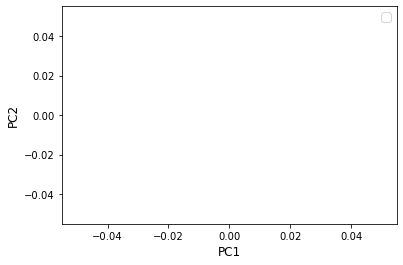

In [9]:
#step4

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X_PCA[y==0, 0], X_PCA[y==0, 1], marker='.', linewidth=2)
ax.scatter(X_PCA[y==1, 0], X_PCA[y==1, 1], marker='.', linewidth=2)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.legend(fontsize=12)

plt.show()

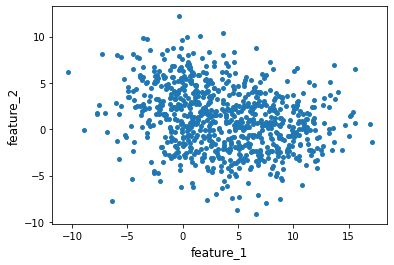

In [10]:
import matplotlib.pyplot as plt

data = data.values  # Convert DataFrame to Numpy array

plt.figure()
plt.scatter(data[:,0], data[:,1], marker='.', linewidth=2)
plt.xlabel('feature_1', fontsize=12)
plt.ylabel('feature_2', fontsize=12)
plt.show()

In [11]:
#step5
#Before running the clustering algorithm, give two suggestions for the number of clusters?
# The number of clusters are 2
#1.cluster 0, cluster 1
#2.cluster 0, cluster 1, cluster 2

In [12]:
#step6
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=10)

In [13]:
kmeans.fit(data)

KMeans(init='random', n_clusters=2)

In [14]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

50507.85053321816
[[ 8.58982971  0.24528152  0.17610141  2.36271703  2.72894149]
 [ 1.04704527  1.68309271 -8.41369656  5.40651185 -4.75829431]]
5


In [15]:
kmeans.labels_[:5]

array([1, 1, 1, 1, 0])

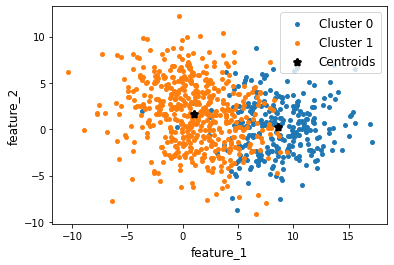

In [16]:
#step7

labels = kmeans.labels_
u = kmeans.cluster_centers_

plt.figure()
plt.scatter(data[labels==0,0], data[labels==0,1], marker='.', linewidth=2, label='Cluster 0')
plt.scatter(data[labels==1,0], data[labels==1,1], marker='.', linewidth=2, label='Cluster 1')
plt.scatter(u[:,0], u[:,1], marker='*', linewidth=3, color='black', label='Centroids')
plt.xlabel('feature_1', fontsize=12)
plt.ylabel('feature_2', fontsize=12)
plt.legend(fontsize=12)
plt.show()

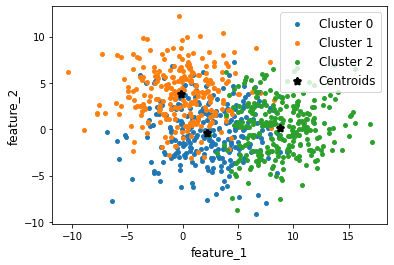

In [17]:
kmeans = KMeans(init='random', n_clusters=3, n_init=10)
kmeans.fit(data)

labels = kmeans.labels_
u = kmeans.cluster_centers_

plt.figure()
plt.scatter(data[labels==0,0], data[labels==0,1], marker='.', linewidth=2, label='Cluster 0')
plt.scatter(data[labels==1,0], data[labels==1,1], marker='.', linewidth=2, label='Cluster 1')
plt.scatter(data[labels==2,0], data[labels==2,1], marker='.', linewidth=2, label='Cluster 2')
plt.scatter(u[:,0], u[:,1], marker='*', linewidth=3, color='black', label='Centroids')
plt.xlabel('feature_1', fontsize=12)
plt.ylabel('feature_2', fontsize=12)
plt.legend(fontsize=12)
plt.show()